In [1]:
!pip install opencv-python # OpenCV 라이브러리 설치

import cv2 # OpenCV 라이브러리 import
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(1067, 800)


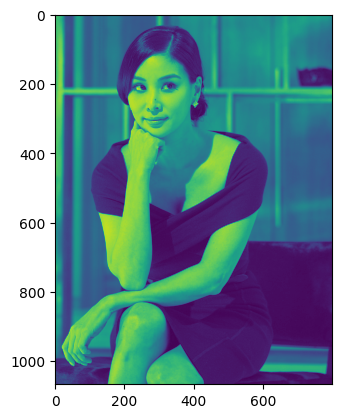

In [9]:

img = cv2.imread('/content/gdrive/My Drive/Images/gsy.jpg') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
plt.imshow(gimg1)

In [5]:
gOutimg = np.zeros((gimg1.shape[0],gimg1.shape[1]))

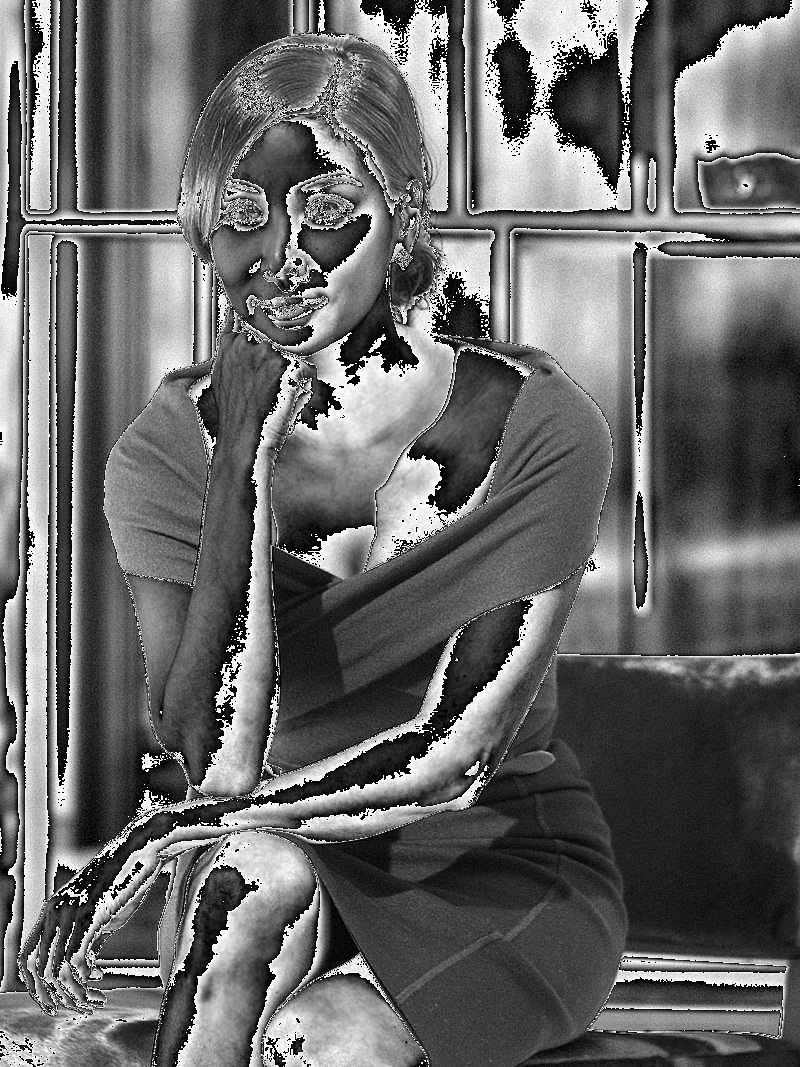

In [13]:
for h in range(0,gimg1.shape[0]):
  for w in range(0,gimg1.shape[1]):
    val = gimg1[h,w]%64
    val = val*4
    gOutimg[h,w]=val

#plt.imshow(gOutimg, cmap = 'gray')
cv2_imshow(gOutimg)

In [19]:
equalVal = 200
width =5
min = equalVal - width
max = equalVal + width

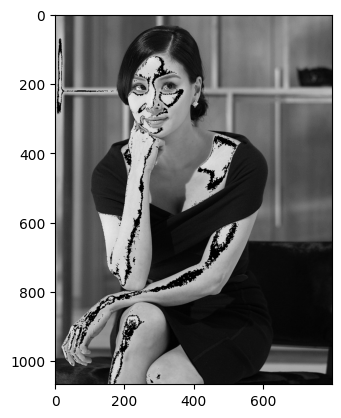

In [20]:
for h in range(0,gimg1.shape[0]):
  for w in range(0,gimg1.shape[1]):
    if(gimg1[h,w]>min and gimg1[h,w] < max):
      gOutimg[h,w]=0
    else:
      gOutimg[h,w] = gimg1[h,w]

plt.imshow(gOutimg, cmap = 'gray')

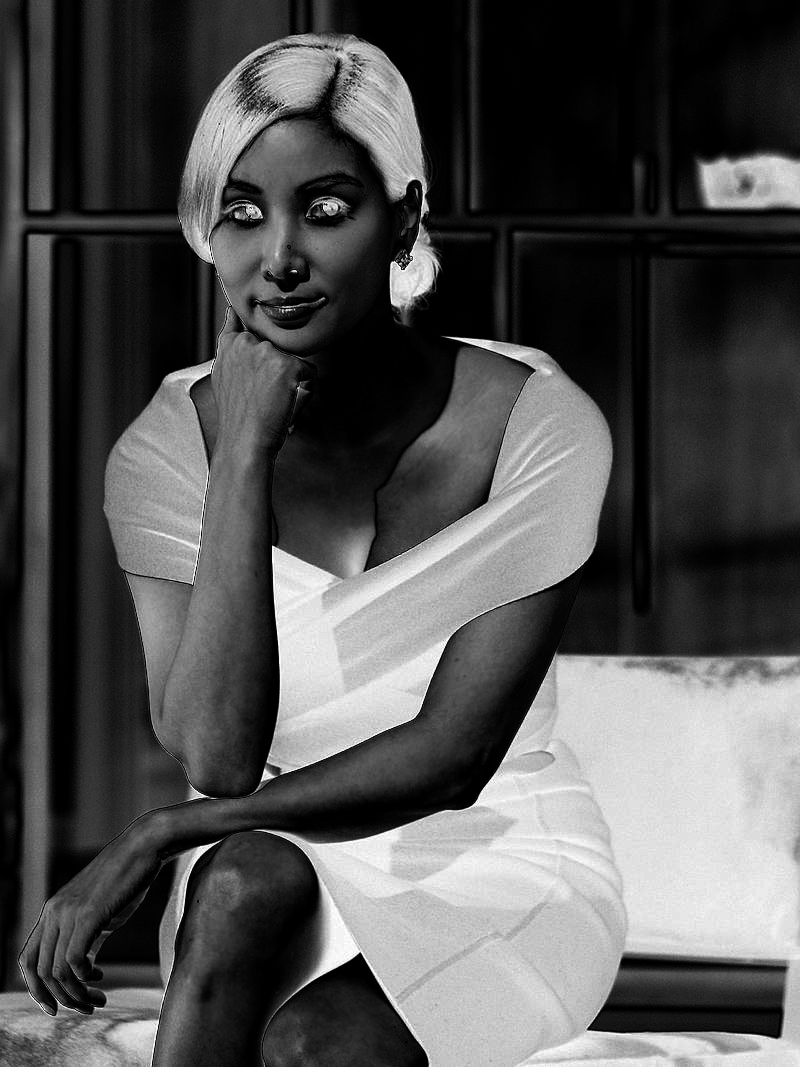

In [21]:
for h in range(0,gimg1.shape[0]):
  for w in range(0,gimg1.shape[1]):
    Val = 255*(gimg1[h,w]/128 -1)*(gimg1[h,w]/128 -1)
    gOutimg[h,w] = Val

cv2_imshow(gOutimg)

In [37]:
planeNumber = 1
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue *2

In [45]:
gOutimg = np.zeros_like(gWaterMarker, dtype=np.uint8)

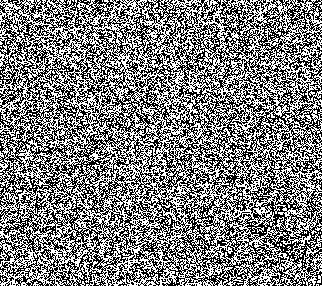

In [46]:
for h in range(0,gWaterMarker.shape[0]):
  for w in range(0,gWaterMarker.shape[1]):
    imVal = (int)(gWaterMarker[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)

(286, 322)


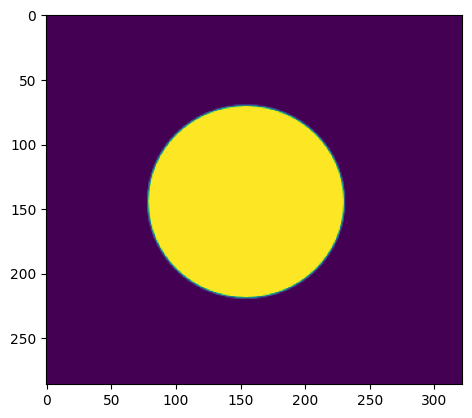

In [49]:

img = cv2.imread('/content/gdrive/My Drive/Images/circle.bmp') # 이미지 파일 읽기
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gimg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
plt.imshow(gimg2)

In [42]:
gimg1 = cv2.resize(gimg1, (gimg2.shape[1], gimg2.shape[0]))


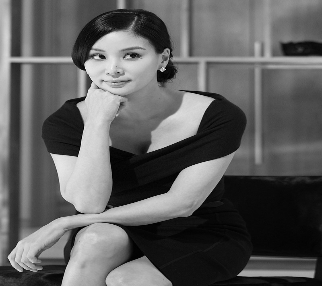

In [43]:
gWaterMarker = gimg1.copy()

for h in range(0,gimg1.shape[0]):
  for w in range(0,gimg1.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg1[h,w] % 2  == 0):
        gWaterMarker[h,w] += 1
      else:
        if(gimg1[h,w] % 2 == 1):
          gWaterMarker[h,w] -= 1
cv2_imshow(gWaterMarker)
